<a href="https://colab.research.google.com/github/DishaArsude/Tamizan-Skills-Internship-ML-AI-PROJECT-6/blob/main/Project_6_Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [ ]:
 1. Load Historical Stock Data
ticker = 'AAPL'  # You can change to any e.g., 'TSLA', 'MSFT'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)


In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 9.3334e-04 - val_loss: 0.0028
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 8.5968e-04 - val_loss: 8.7127e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.7479e-04 - val_loss: 9.7932e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 8.7747e-04 - val_loss: 0.0043
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 9.2313e-04 - val_loss: 9.7945e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.6111e-04 - val_loss: 7.1316e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.1950e-04 - val_loss: 0.0012
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 5.9592e-04 - val_loss: 0.0011
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 6.4565e-04 - val_loss: 0.0026
Epoch 12/20

In [ ]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


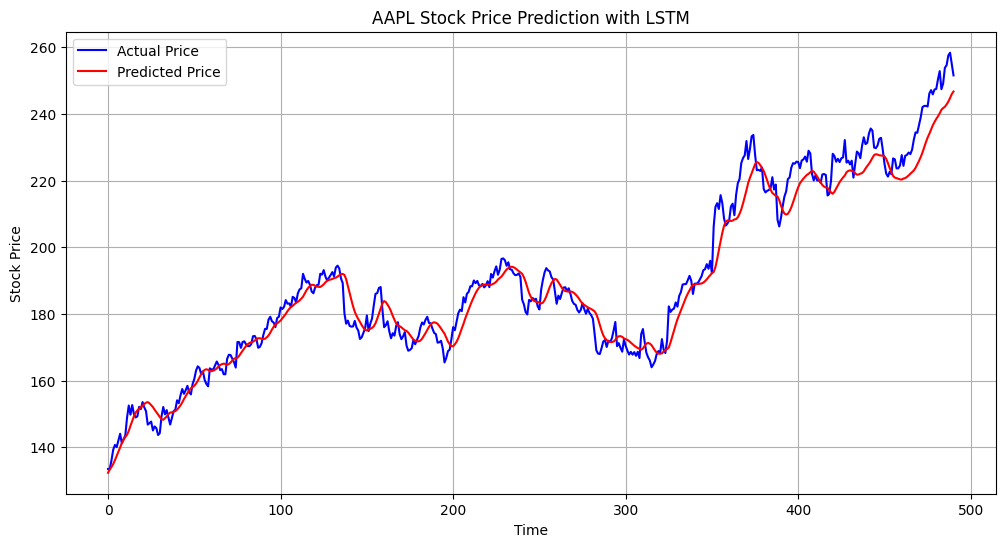

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title(f"{ticker} Stock Price Prediction with LSTM")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()